### Introduction

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.


When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

## Importing the libraries 

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Uploading the Application data files

In [4]:
# uploading application data
# Extract file by location - 'C:\\Users\\home\\Downloads//application_data.csv'

app0_d = pd.read_csv('application_data.csv')
app0_d

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [3]:
# checking rows and columns
app0_d.shape

(307511, 122)

In [4]:
# checking information
app0_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# Describing data
app0_d.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

### Uploading previous_application data

In [23]:
# Uploading file
# Extract file by location - C:\\Users\\home\\Downloads//previous_application.csv

pre0_a = pd.read_csv('previous_application.csv')
pre0_a.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [9]:
# Setting the max limit for see the data
pd.set_option("display.max_rows", None, "display.max_columns", None)


## Data Analysis For Application Data

In [10]:
#Checking null values and sorting them
app0_d.isnull().sum().sort_values(ascending = False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [11]:
# Checking the % of null values for each column in new dataset
null = app0_d.isnull().sum()/len(app0_d)*100
null.sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [161]:
# Looking for all index name
null.index

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

#### Removing the column with more than 50% null values

In [51]:
# Removing all the columns with more than 50% nulls values/Keeping all of them with <= 50% null values
app0_d = app0_d.loc[:,app0_d.isnull().mean()<=0.5]
app0_d.shape

(307511, 81)

In [163]:
# checking values
app0_d.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT AMT_ANNUITY  \
0               Y             0          202500.0    406597.5     24700.5   
1               N             0          270000.0   1293502.5     35698.5   
2               Y             0           67500.0    135000.0      6750.0   
3               Y             0          135000.0    312682.5     29686.5   
4               Y             0          121500.0    513000.0     21865.5   

  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         24700.5   Unaccompanied          Working   
1         35698.5          Family    State servant   
2          6750.0   Unaccompanied          Working   
3         29686.5   Unaccompanied          Working   
4         21865.5   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          25            637             3648.0   
1                    0.003541          45           1188             1186.0   
2                    0.010032          52            225             4260.0   
3                    0.008019          52           3039             9833.0   
4                    0.028663          54           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers             1.0   
1                 1           1           0      Core staff             2.0   
2                 1           1           0        Laborers             1.0   
3                 1           0           0        Laborers             2.0   
4                 1           0           0      Core staff             1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   

In [164]:
# counting the null values
app0_d.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

#### Checking for values to less or equal to 15%

In [16]:
#Selecting columns with less or equal to than 15% null values
list(app0_d.columns[(app0_d.isnull().mean()<=0.15) & (app0_d.isnull().mean()>0)])

#We will check those columns for possible imputation

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [17]:
app0_d.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307511.000000     307511.000000  307511.000000  307511.000000   
mean          0.199368          0.998133       0.281066       0.056720   
std           0.399526          0.043164       0.449521       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.26583

## Checking for values to impute in columns


#### OCCUPATION_TYPE imputation

In [18]:
# OCCUPATION_TYPE imputation
app0_d['OCCUPATION_TYPE'].value_counts(normalize=True)*100
                  

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [19]:
# Null value count
app0_d.OCCUPATION_TYPE.isnull().sum()


96391

In [20]:
# Filling Null values with Unknown
app0_d["OCCUPATION_TYPE"] = app0_d.OCCUPATION_TYPE.fillna("Unknown")


In [21]:
#Confirming the desired operation has done.

app0_d.OCCUPATION_TYPE.isnull().sum()


0

### AMT_ANNUITY imputation

In [22]:
# Checking null values
app0_d.AMT_ANNUITY.isnull().sum()


12

In [23]:
# Counting the values
app0_d['AMT_ANNUITY'].value_counts()


9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
11250.0     1459
26217.0     1453
20250.0     1345
12375.0     1339
31653.0     1269
26640.0     1236
22500.0     1234
16875.0     1213
36459.0     1191
33025.5      938
26446.5      916
22018.5      904
23773.5      875
25537.5      836
26316.0      829
31261.5      822
21906.0      800
7875.0       741
40320.0      703
21888.0      688
32602.5      687
15750.0      684
27000.0      681
19867.5      653
33750.0      652
29970.0      643
21775.5      643
30528.0      626
45000.0      570
32895.0      564
14350.5      564
14751.0      551
23494.5      540
42790.5      527
26086.5      507
29250.0      506
23931.0      501
31630.5      499
31522.5      495
24939.0      491
16456.5      490
19125.0      471
21109.5      466
13963.5      462
30078.0      450
28408.5      449
45333.0      441
46084.5      436
67500.0      431
16011.0      419
24543.0      418
35937.0      418
25321.5      417
24246.0      4

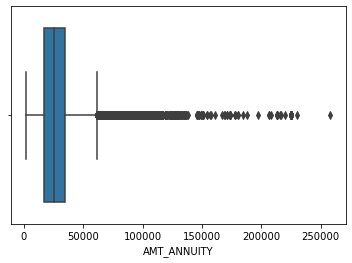

In [24]:
# Using boxplot to see the outlier
sns.boxplot(app0_d['AMT_ANNUITY'])
plt.show()

In [25]:
app0_d.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [26]:
# AMT_ANNUITY is Numerical column so median value is imputing
app0_d["AMT_ANNUITY"] = app0_d.AMT_ANNUITY.fillna("median") 


In [27]:
#Confirming the desired operation has done.

app0_d["AMT_ANNUITY"].isna().sum()

0

### EXT_SOURCE_2 imputation

In [28]:
# counting the values
app0_d['EXT_SOURCE_2'].value_counts()

2.858979e-01    721
2.622584e-01    417
2.652563e-01    343
1.596792e-01    322
2.653117e-01    306
2.665198e-01    244
2.631436e-01    243
1.621446e-01    238
1.621921e-01    234
1.631870e-01    184
1.604053e-01    173
1.915259e-01    169
2.453496e-01    167
3.542247e-01    149
1.942664e-01    140
1.923161e-01    131
3.572820e-01    129
1.942151e-01    127
1.953538e-01    123
3.551256e-01    113
3.411229e-01    110
2.556162e-01     92
3.585685e-01     90
2.930897e-01     85
2.620553e-01     84
3.441915e-01     84
3.573422e-01     81
2.547600e-01     80
3.420278e-01     73
2.961436e-01     72
2.007754e-01     71
3.442507e-01     69
1.542654e-01     67
3.454859e-01     67
2.290030e-01     67
2.962028e-01     67
2.746463e-01     66
2.598076e-01     64
2.974306e-01     64
3.102603e-01     61
2.629359e-01     61
2.533716e-01     59
1.548483e-01     59
2.650476e-01     59
2.563408e-01     58
5.806869e-01     57
2.632411e-01     56
6.019534e-01     55
1.535706e-01     55
6.156443e-01     54


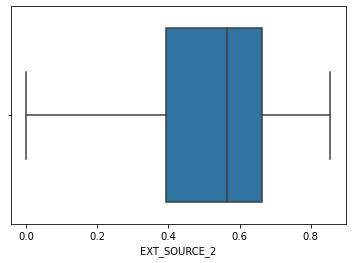

In [29]:
# Using the boxplot to see the outlier 
sns.boxplot(app0_d['EXT_SOURCE_2'])
plt.show()

In [165]:
# EXT_SOURCE_2 has no outlier, so choose mean to impute the column
impval = round(app0_d['EXT_SOURCE_2'].mean(),2)
print(f'EXT_SOURCE_2 has no outlier, the column can be imputed by the mean i.e. {impval}')

EXT_SOURCE_2 has no outlier, the column can be imputed by the mean i.e. 0.51


In [31]:
app0_d['EXT_SOURCE_2'].isna().sum()

660

### NAME_TYPE_SUITE imputation


In [32]:
# Imputation for categorical 
app0_d['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [33]:
# checking unique values
app0_d.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [34]:
# Checking null values
app0_d.NAME_TYPE_SUITE.isnull().sum()

1292

In [35]:
app0_d.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [36]:
# using mode to imputation
impval = app0_d.NAME_TYPE_SUITE.mode()
print(f'column NAME_TYPE_SUITE is a categorical column. So column can be imputed using the mode i.e {impval}') 


column NAME_TYPE_SUITE is a categorical column. So column can be imputed using the mode i.e 0    Unaccompanied
dtype: object


In [37]:
# filling the average values
app0_d["NAME_TYPE_SUITE"] = app0_d.NAME_TYPE_SUITE.fillna("Unaccompanied") 


In [38]:
#Confirming the desired operation has done.

app0_d.NAME_TYPE_SUITE.isna().sum()

0

### AMT_GOODS_PRICE imputation


In [39]:
# Checking values 
app0_d.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

In [40]:
# Checking null values
app0_d.AMT_GOODS_PRICE.isna().sum()

278

In [41]:
# Checking describe
app0_d.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

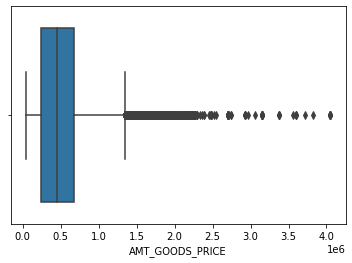

In [42]:
# using boxplot for checking null values
sns.boxplot(app0_d.AMT_GOODS_PRICE)
plt.show()

In [43]:
# this is a continuous variable with outliers we can impute column using median value
impvul = round(app0_d['AMT_GOODS_PRICE'].median(),2)
print(f'AMT_GOODS_PRICE has outliers, the column can be imputed using the median i.e. {impvul}')

AMT_GOODS_PRICE has outliers, the column can be imputed using the median i.e. 450000.0


In [44]:
# Filling Null values
app0_d["AMT_GOODS_PRICE"] = app0_d.AMT_ANNUITY.fillna("median") 


In [45]:
#Confirming the desired operation.

app0_d.AMT_GOODS_PRICE.isna().sum()

0

### CNT_FAM_MEMBERS imputation


In [46]:
# Checking null values
app0_d.CNT_FAM_MEMBERS.isna().sum()

2

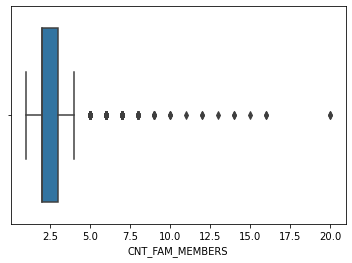

In [47]:
# Useing boxplot to check outlier
sns.boxplot(app0_d.CNT_FAM_MEMBERS)
plt.show()

In [48]:
# This is a continuous variable so, we can impute the mean/median values.
# Imputing null values with Median due to the presence of outlier values.

app0_d["CNT_FAM_MEMBERS"] = app0_d.CNT_FAM_MEMBERS.fillna("median") 


In [49]:
#Confirming the desired operation.

app0_d.CNT_FAM_MEMBERS.isna().sum()

0

### Working on Days columns

In [50]:
# columns starting with 'DAYS'
days_col = [col for col in app0_d if col.startswith('DAYS')]
days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [51]:
# Checking the values present in columns starting with 'DAYS'

print(app0_d['DAYS_BIRTH'].unique(),"\n")

print(app0_d['DAYS_EMPLOYED'].unique(),"\n")

print(app0_d['DAYS_REGISTRATION'].unique(),"\n")

print(app0_d['DAYS_ID_PUBLISH'].unique(),"\n")

print(app0_d['DAYS_LAST_PHONE_CHANGE'].unique())


[ -9461 -16765 -19046 ...  -7951  -7857 -25061] 

[  -637  -1188   -225 ... -12971 -11084  -8694] 

[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.] 

[-2120  -291 -2531 ... -6194 -5854 -6211] 

[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [52]:
# All the values are present in negitve, so need to covert in postive
app0_d[days_col] = abs(app0_d[days_col])   # using abs() to convert


In [53]:
print(app0_d['DAYS_BIRTH'].unique(),"\n")

print(app0_d['DAYS_EMPLOYED'].unique(),"\n")

print(app0_d['DAYS_REGISTRATION'].unique(),"\n")

print(app0_d['DAYS_ID_PUBLISH'].unique(),"\n")

print(app0_d['DAYS_LAST_PHONE_CHANGE'].unique())


[ 9461 16765 19046 ...  7951  7857 25061] 

[  637  1188   225 ... 12971 11084  8694] 

[ 3648.  1186.  4260. ... 16396. 14558. 14798.] 

[2120  291 2531 ... 6194 5854 6211] 

[1134.  828.  815. ... 3988. 3899. 3538.]


### Checking the datatype

In [54]:
app0_d.tail(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

       AMT_ANNUITY AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506     27558.0         27558.0   Unaccompanied               Working   
307507     12001.5         12001.5   Unaccompanied             Pensioner   
307508     29979.0         29979.0   Unaccompanied               Working   
307509     20205.0         20205.0   Unaccompanied  Commercial associate   
307510     49117.5         49117.5   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561        9327            236   
307507                    0.025164       20775         365243   
307508                    0.005002       14966           7921   
307509                    0.005313       11961           4786   
307510                    0.046220       16856           1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
307506             8456.0             1982           1               1   
307507             4388.0             4090           1               0   
307508             6737.0             5150           1               1   
307509             2562.0              931           1               1   
307510             5128.0              410           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
307506                0                 1           0           0   
307507                0                 1           1           0   
307508                0                 1           0           1   
307509                0                 1           0           0   
307510                1                 1           1           0   

       OCCUPATION_TYPE CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506     Sales staff             1.0                     1   
307507         Unknown             1.0                     2   
307508        Managers             1.0                     3   
307509        Laborers             2.0                     2   
307510        Laborers             2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506                       15                           0   
307507                        8                    

In [166]:
#Checking the float type columns
app0_d.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [167]:
#Converting some columns to int64 datatype
Col_covt = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
app0_d.loc[:,Col_covt]=app0_d.loc[:,Col_covt].apply(lambda col: col.astype('int',errors='ignore' ))

In [168]:
#Checking the object type columns
obj_covt=app0_d.select_dtypes(include='object').columns
obj_covt

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [169]:
app0_d.loc[:,obj_covt]=app0_d.loc[:,obj_covt].apply(lambda col: col.astype('str',errors='ignore'))

In [59]:
# Now reading gender values
app0_d.CODE_GENDER.value_counts()


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [60]:
# Find that XNA has only 4 values so, replacing XNA value with F

app0_d['CODE_GENDER'].replace(['XNA'],['F'],inplace=True)
app0_d.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

###  Analysis for Binning variables

In [61]:
#Binning for AMT_INCOME_TOTAL

app0_d['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])


0.0        25650.0
0.1        81000.0
0.3       112500.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [62]:
#Creating A new categorical variable based on total income
app0_d['INCOME_GROUP']=pd.qcut(app0_d['AMT_INCOME_TOTAL'],q=[0,0.1,0.3,0.6,0.8,1],labels=['Verylow','Low','Medium','High','Veryhigh'])

In [63]:
(app0_d['INCOME_GROUP']).head(10)

0        High
1    Veryhigh
2     Verylow
3      Medium
4      Medium
5         Low
6        High
7    Veryhigh
8         Low
9      Medium
Name: INCOME_GROUP, dtype: category
Categories (5, object): ['Verylow' < 'Low' < 'Medium' < 'High' < 'Veryhigh']

In [64]:
# Binning for DAYS_BIRTH
(app0_d['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.0
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [65]:
# Converting 'DAYS_BIRTH' to years
app0_d['DAYS_BIRTH']= (app0_d['DAYS_BIRTH']/365).astype(int)

In [66]:
# checking unique values
app0_d['DAYS_BIRTH'].unique()


array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [67]:
# Biining for 'DAYS_BIRTH'
app0_d['DAYS_BIRTH_BINS']=pd.cut(app0_d['DAYS_BIRTH'], bins=[18,30,45,60,90], labels=['Young','Very_Young','Middle_Age', 'Senior_Citizen'])

In [68]:
# counting the values
app0_d['DAYS_BIRTH_BINS'].value_counts()


Very_Young        123114
Middle_Age        102223
Young              52806
Senior_Citizen     29368
Name: DAYS_BIRTH_BINS, dtype: int64

### Checking for imbalance in Target


In [69]:
# checking value count
app0_d['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

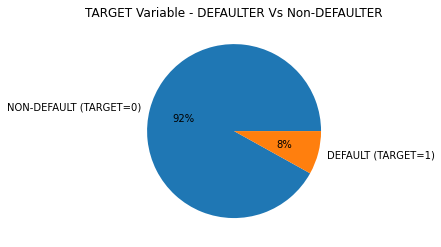

In [5]:
# Showing pie chart value count in % for Defaulter and Non Defaulter
plt.pie(app0_d['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs Non-DEFAULTER')
plt.show()

####  More than 92% of people didn't default as opposed to 8% who defaulted. so it observed imbalance between people who defaulted.

### Splitting the original dataset into two different datasets depending upon the target value


In [8]:
# Dataframe with all the data related to non-defaulters
target0 = app0_d.loc[app0_d.TARGET == 0]

# Dataframe with all the data related to defaulters
target1 = app0_d.loc[app0_d.TARGET == 1]

### Showing Distribution on the basis of Target 0 and Target 1 

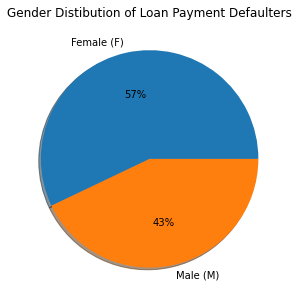

In [72]:
# Gender Distibution of Loan Payment Defaulters

plt.figure(figsize = (10,5))
plt.pie(target1['CODE_GENDER'].value_counts(normalize=True)*100,labels=['Female (F)','Male (M)'],autopct='%1.f%%',shadow=True)
plt.title('Gender Distibution of Loan Payment Defaulters')
plt.show()

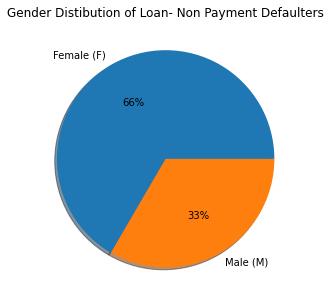

In [73]:
# Gender Distibution of Loan Non-Payment Difficulties

plt.figure(figsize = (10,5))
plt.pie(target0['CODE_GENDER'].value_counts(normalize=True)*100,labels=['Female (F)','Male (M)'],autopct='%2.d%%',shadow=True)
plt.title('Gender Distibution of Loan- Non Payment Defaulters')
plt.show()

>  Female contribute 66% to the non-defaulters while 57% to the defaulters. We observed that more
> <br> female applying for loans than males and hence the more number of female defaulters as well. 
> <br> **But the rate of defaulting of FEMALE is much lower compared to their MALE counterparts.**


#### FLAG_OWN_CAR Distribution of Loan Payment Defaulters

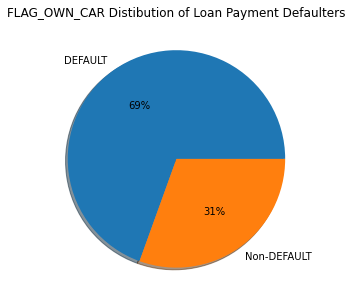

In [74]:
# FLAG_OWN_CAR Distribution of Loan Payment Defaulters

plt.figure(figsize = (10,5))
plt.pie(target1['FLAG_OWN_CAR'].value_counts(normalize=True)*100,labels=['DEFAULT','Non-DEFAULT'],autopct='%1.f%%',shadow=True)
plt.title('FLAG_OWN_CAR Distibution of Loan Payment Defaulters')
plt.show()

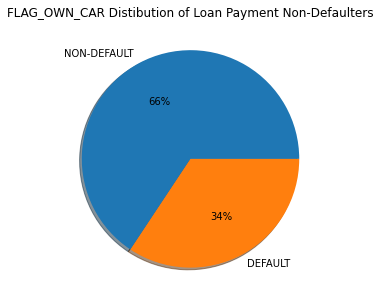

In [75]:
# FLAG_OWN_CAR Distribution of Loan Payment Non-Defaulters

plt.figure(figsize = (10,5))
plt.pie(target0['FLAG_OWN_CAR'].value_counts(normalize=True)*100,labels=['NON-DEFAULT','DEFAULT'],autopct='%1.f%%',shadow=True)
plt.title('FLAG_OWN_CAR Distibution of Loan Payment Non-Defaulters')
plt.show()

> People with cars contribute 66% to the non-defaulters while 69% to the defaulters.While people who have car default more often,the reason could be there are simply more people without cars.
> <br>Looking at the percentages in both the charts, 
> <br> **Conclude that the rate of default of people having car is low compared to people who don't have car.**

#### NAME_INCOME_TYPE Distibution of Loan Payment Defaulters

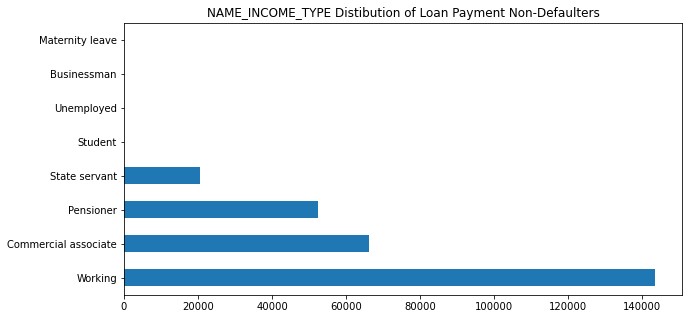

In [76]:
# NAME_INCOME_TYPE Distribution of Loan Payment Non-Defaulters

plt.figure(figsize = (10,5))

target0['NAME_INCOME_TYPE'].value_counts().head(10).plot.barh()
plt.title('NAME_INCOME_TYPE Distibution of Loan Payment Non-Defaulters')
plt.show()

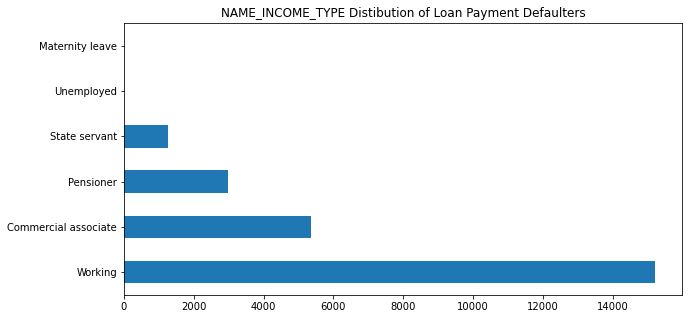

In [77]:
# NAME_INCOME_TYPE Distribution of Loan Payment Defaulters

plt.figure(figsize = (10,5))

target1['NAME_INCOME_TYPE'].value_counts().plot.barh()
plt.title('NAME_INCOME_TYPE Distibution of Loan Payment Defaulters')
plt.show()

The students don't default. The reason could be they are not required to pay during the time they are students.
Obesverd the BusinessMen never default. Most of the loans are distributed to working class people.

Also observed that decrease in the percentage of Payment Difficulties who are pentioners and an increase in the percentage of Payment Difficulties who are working.

#### NAME_FAMILY_STATUS Distibution

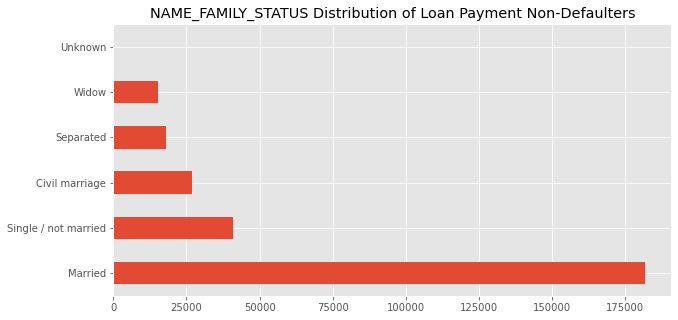

In [151]:
# NAME_FAMILY_STATUS Distribution of Loan Payment Non-Defaulters

plt.figure(figsize = (10,5))

target0['NAME_FAMILY_STATUS'].value_counts().head(10).plot.barh()
plt.title('NAME_FAMILY_STATUS Distribution of Loan Payment Non-Defaulters')
plt.show()

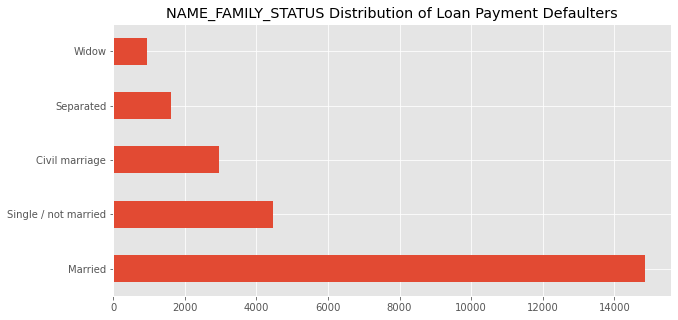

In [152]:
# NAME_FAMILY_STATUS Distribution of Loan Payment Defaulters

plt.figure(figsize = (10,5))

target1['NAME_FAMILY_STATUS'].value_counts().head(10).plot.barh()
plt.title('NAME_FAMILY_STATUS Distribution of Loan Payment Defaulters')
plt.show()

Observeing that a decrease in the percentage of married and widowed with Loan Payment Difficulties and an increase in the the percentage of single and civil married with Loan Payment Difficulties when comapred with the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties.

#### NAME_HOUSING_TYPE Distibution

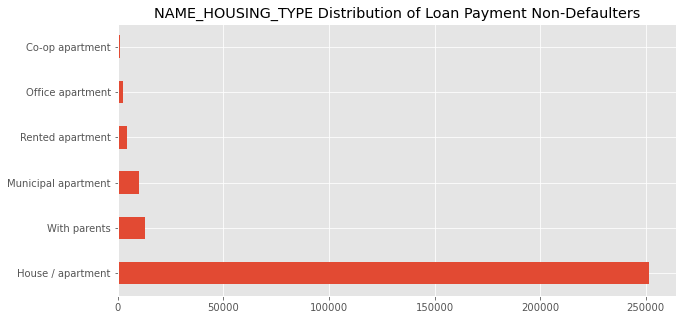

In [153]:
# NAME_HOUSING_TYPE Distribution of Loan Payment Non-Defaulters

plt.figure(figsize = (10,5))

target0['NAME_HOUSING_TYPE'].value_counts().head(10).plot.barh()
plt.title('NAME_HOUSING_TYPE Distribution of Loan Payment Non-Defaulters')
plt.show()

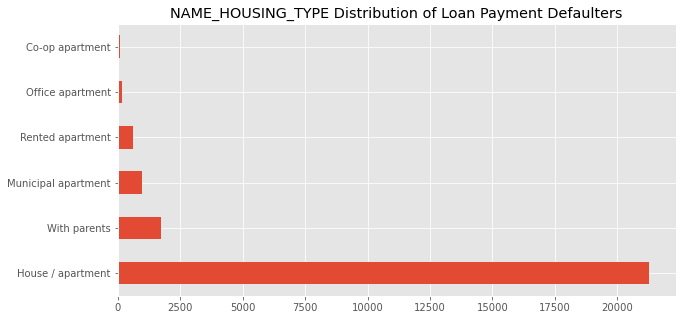

In [154]:
# NAME_HOUSING_TYPE Distribution of Loan Payment Defaulters

plt.figure(figsize = (10,5))

target1['NAME_HOUSING_TYPE'].value_counts().head(10).plot.barh()
plt.title('NAME_HOUSING_TYPE Distribution of Loan Payment Defaulters')
plt.show()

> It observed from the graph that people who have House/Appartment, tend to apply for more loans.
> <br>People living with parents tend to default more often when compared with others.The reason could be their living expenses are more due to their parents living with them. 

#### NAME_EDUCATION_TYPE Distibution

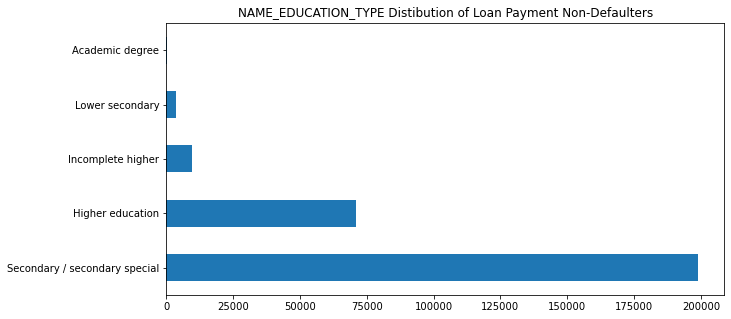

In [82]:
# NAME_EDUCATION_TYPE Distibution of Loan Payment Non-Defaulters

plt.figure(figsize = (10,5))

target0['NAME_EDUCATION_TYPE'].value_counts().head(10).plot.barh()
plt.title('NAME_EDUCATION_TYPE Distibution of Loan Payment Non-Defaulters')
plt.show()

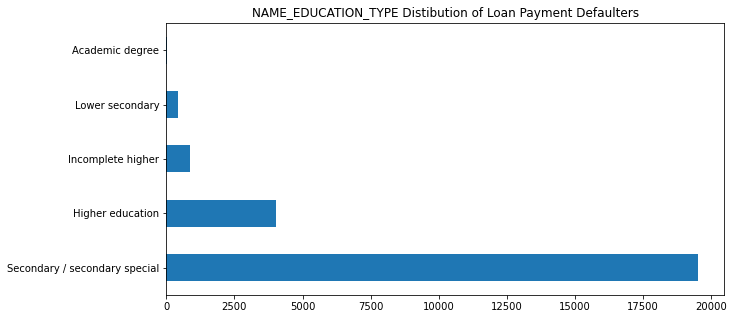

In [83]:
# NAME_EDUCATION_TYPE Distibution of Loan Payment Defaulters

plt.figure(figsize = (10,5))

target1['NAME_EDUCATION_TYPE'].value_counts().head(10).plot.barh()
plt.title('NAME_EDUCATION_TYPE Distibution of Loan Payment Defaulters')
plt.show()

We observe an increase of Loan Payment Difficulties whose educational qualifications are secondary/secondary special and a decrease in the Loan Payment Difficulties who have completed higher education. 

#### INCOME_GROUP Distribution

In [84]:
print("Values in % for Non-Defaulters:")
print(target0.INCOME_GROUP.value_counts(normalize=True)*100,"\n")

print("Values in % for Defaulters:")

print(target1.INCOME_GROUP.value_counts(normalize=True)*100)


Values in % for Non-Defaulters:
Medium      27.265588
High        24.560466
Low         21.748159
Veryhigh    15.581246
Verylow     10.844541
Name: INCOME_GROUP, dtype: float64 

Values in % for Defaulters:
Medium      29.107754
High        24.507553
Low         22.992951
Veryhigh    12.374622
Verylow     11.017120
Name: INCOME_GROUP, dtype: float64


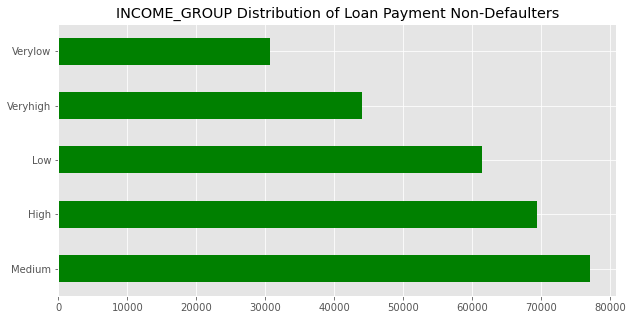

In [155]:
# INCOME_GROUP Distribution of Loan Payment Non-Defaulters

plt.figure(figsize = (10,5))

target0['INCOME_GROUP'].value_counts().plot.barh(color='g')
plt.title('INCOME_GROUP Distribution of Loan Payment Non-Defaulters')
plt.show()

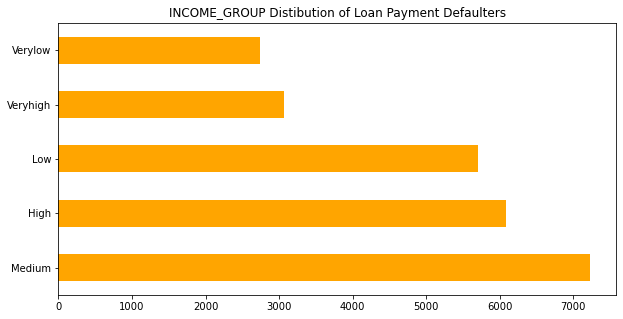

In [86]:
# INCOME_GROUP Distibution of Loan Payment Defaulters

plt.figure(figsize = (10,5))

target1['INCOME_GROUP'].value_counts().plot.barh(color='orange')
plt.title('INCOME_GROUP Distibution of Loan Payment Defaulters')
plt.show()

> Observed that the Very High income group tend to default less often. They contribute 12.4% to the total number of defaulters, while they contribute 15.6% to the Non-Defaulters. 

#### REGION_RATING_CLIENT Distribution

In [87]:
# checking values
print("Values in % for Non-Defaulters:")
print(target0.REGION_RATING_CLIENT.value_counts(normalize=True)*100,"\n")

print("Values in % for Defaulters:")

print(target1.REGION_RATING_CLIENT.value_counts(normalize=True)*100)


Values in % for Non-Defaulters:
2    73.960861
3    15.198489
1    10.840650
Name: REGION_RATING_CLIENT, dtype: float64 

Values in % for Defaulters:
2    72.132931
3    21.615307
1     6.251762
Name: REGION_RATING_CLIENT, dtype: float64


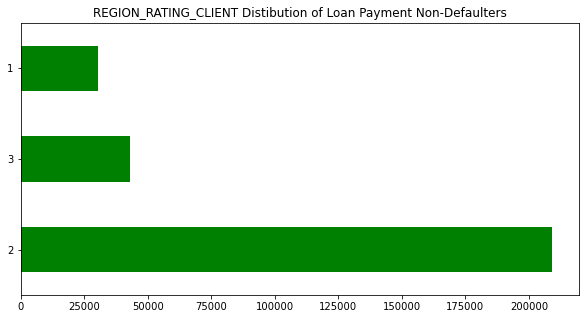

In [88]:
# REGION_RATING_CLIENT Distibution of Loan Payment Non-Defaulters

plt.figure(figsize = (10,5))

target0['REGION_RATING_CLIENT'].value_counts().plot.barh(color='g')
plt.title('REGION_RATING_CLIENT Distibution of Loan Payment Non-Defaulters')
plt.show()

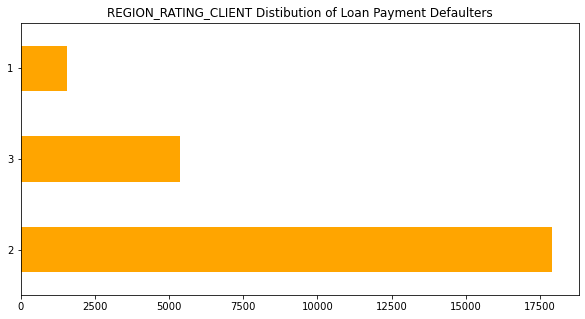

In [89]:
# REGION_RATING_CLIENT Distribution of Loan Payment Non-Defaulters

plt.figure(figsize = (10,5))

target1['REGION_RATING_CLIENT'].value_counts().plot.barh(color='orange')
plt.title('REGION_RATING_CLIENT Distibution of Loan Payment Defaulters')
plt.show()

 #### Observed that people from 3rd trie region defaulter increase by 21.6%. More people from 2nd tier regions tend to apply for loans.

#### DAYS_BIRTH_BINS Distribution

In [90]:
# checking values
print("Values in % for Non-Defaulters:")
print(target0.DAYS_BIRTH_BINS.value_counts(normalize=True)*100,"\n")

print("Values in % for Defaulters:")

print(target1.DAYS_BIRTH_BINS.value_counts(normalize=True)*100)

Values in % for Non-Defaulters:
Very_Young        39.721458
Middle_Age        33.849925
Young             16.550873
Senior_Citizen     9.877744
Name: DAYS_BIRTH_BINS, dtype: float64 

Values in % for Defaulters:
Very_Young        43.613293
Middle_Age        26.320242
Young             24.245720
Senior_Citizen     5.820745
Name: DAYS_BIRTH_BINS, dtype: float64


In [91]:
target0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 83 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    282686 non-null  int64   
 1   TARGET                        282686 non-null  int64   
 2   NAME_CONTRACT_TYPE            282686 non-null  object  
 3   CODE_GENDER                   282686 non-null  object  
 4   FLAG_OWN_CAR                  282686 non-null  object  
 5   FLAG_OWN_REALTY               282686 non-null  object  
 6   CNT_CHILDREN                  282686 non-null  int64   
 7   AMT_INCOME_TOTAL              282686 non-null  float64 
 8   AMT_CREDIT                    282686 non-null  float64 
 9   AMT_ANNUITY                   282686 non-null  object  
 10  AMT_GOODS_PRICE               282686 non-null  object  
 11  NAME_TYPE_SUITE               282686 non-null  object  
 12  NAME_INCOME_TYPE              

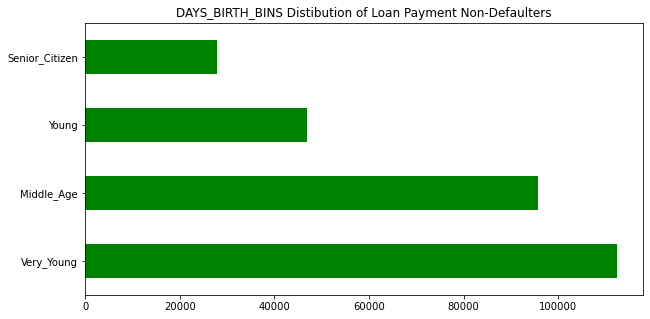

In [92]:
# AMT_INCOME_RANGE Distribution of Loan Payment Non-Defaulters

plt.figure(figsize = (10,5))

target0['DAYS_BIRTH_BINS'].value_counts().plot.barh(color='g')
plt.title('DAYS_BIRTH_BINS Distibution of Loan Payment Non-Defaulters')
plt.show()

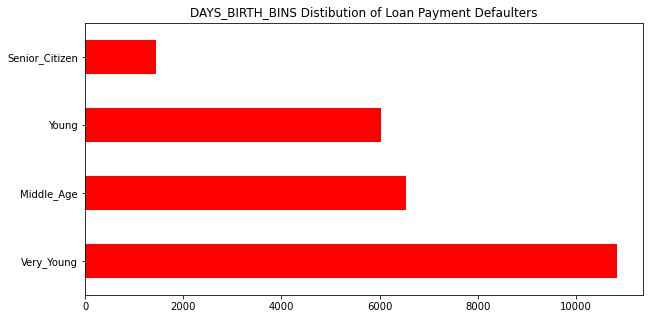

In [93]:
# AMT_INCOME_RANGE Distibution of Loan Payment Defaulters

plt.figure(figsize = (10,5))

target1['DAYS_BIRTH_BINS'].value_counts().plot.barh(color='r')
plt.title('DAYS_BIRTH_BINS Distibution of Loan Payment Defaulters')
plt.show()

#### Observed that increase the defaulers in age group very young by 43% and young by 24%.

### Loan Type
#### NAME_CONTRACT_TYPE Distribution

In [94]:
target0['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

Cash loans         90.209986
Revolving loans     9.790014
Name: NAME_CONTRACT_TYPE, dtype: float64

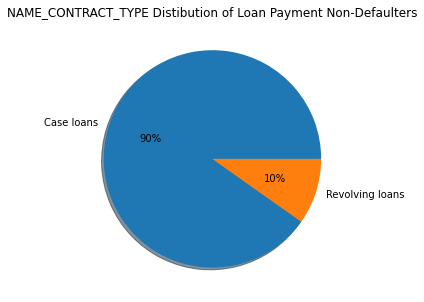

In [95]:
# NAME_CONTRACT_TYPE Distibution of Loan Payment Non-Defaulters

plt.figure(figsize = (10,5))
plt.pie(target0['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100,labels=['Case loans','Revolving loans'],autopct='%1.f%%',shadow=True)
plt.title('NAME_CONTRACT_TYPE Distibution of Loan Payment Non-Defaulters')
plt.show()

#### Observe that cash loans are preffered by both Loan Payment and Loan-Non Payment although there is a decrease in the percentage of Payment, who opt for revolving loans.

### NAME_TYPE_SUITE Distribuition

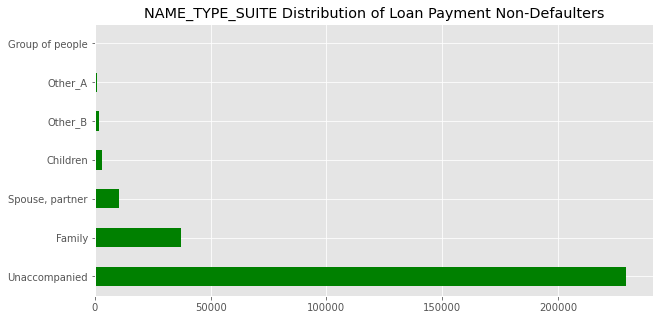

In [156]:
# NAME_TYPE_SUITE Distribution of Loan Payment Non-Defaulters
plt.figure(figsize = (10,5))

target0['NAME_TYPE_SUITE'].value_counts().plot.barh(color='g')
plt.title('NAME_TYPE_SUITE Distribution of Loan Payment Non-Defaulters')
plt.show()

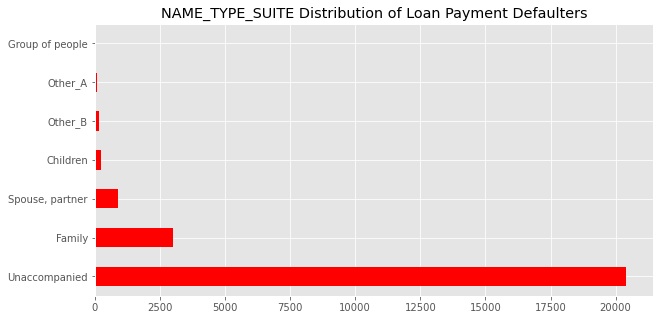

In [157]:
# NAME_TYPE_SUITE Distribution of Loan Payment Defaulters
plt.figure(figsize = (10,5))

target1['NAME_TYPE_SUITE'].value_counts().plot.barh(color='r')
plt.title('NAME_TYPE_SUITE Distribution of Loan Payment Defaulters')
plt.show()

            No majer changes observed

#### ORGANIZATION_TYPE Distrbution

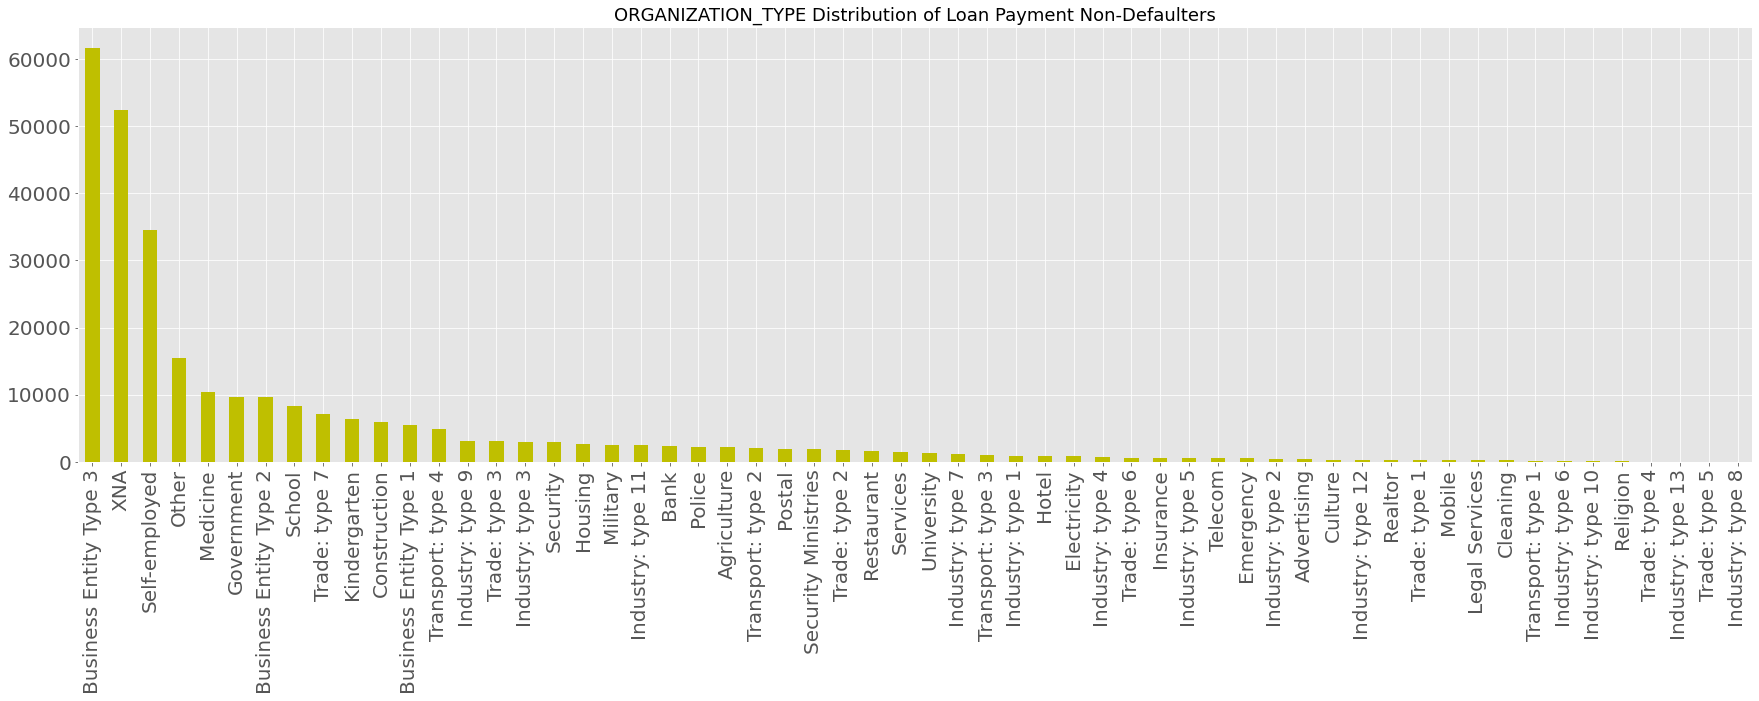

In [158]:
# ORGANIZATION_TYPE Distribution of Loan Payment Non-Defaulters
plt.figure(figsize = (30,8))

target0['ORGANIZATION_TYPE'].value_counts().plot.bar(color='y',fontsize=20)
plt.title('ORGANIZATION_TYPE Distribution of Loan Payment Non-Defaulters',fontsize=18)
plt.show()

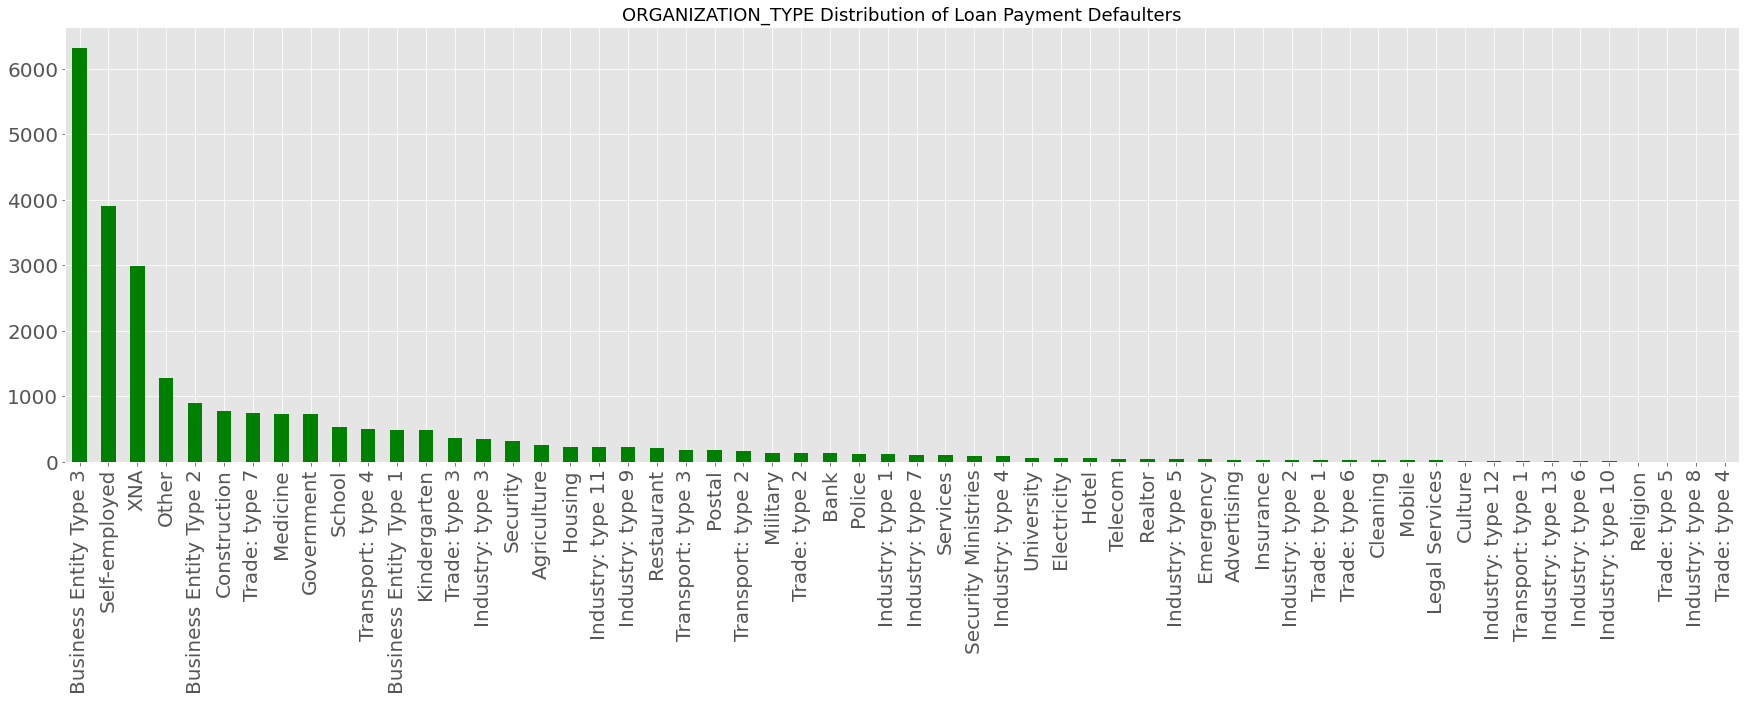

In [159]:
# ORGANIZATION_TYPE Distribution of Loan Payment Defaulters
plt.figure(figsize = (30,8))

target1['ORGANIZATION_TYPE'].value_counts().plot.bar(color='g',fontsize=20)
plt.title('ORGANIZATION_TYPE Distribution of Loan Payment Defaulters',fontsize=18)
plt.show()

      No Majer changes observed

### Univariate continuous variable analysis

In [101]:
# function to dist plot for continuous variables
def plotunidist(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
    
    sns.distplot(a=target0[var],ax=ax1)
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=13)
            
    sns.distplot(a=target1[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=13)    
        
    plt.show()

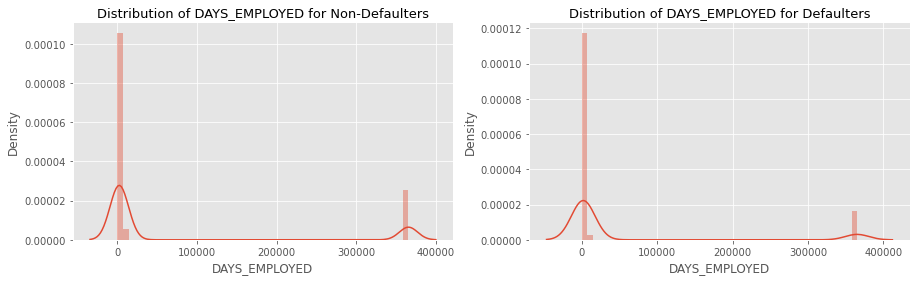

In [102]:
plotunidist('DAYS_EMPLOYED')


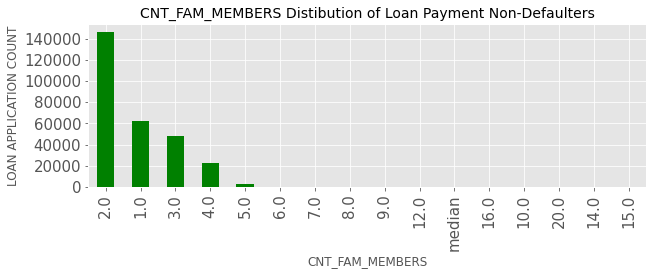

In [103]:
# CNT_FAM_MEMBERS Distibution of Loan Payment Non-Defaulters


plt.figure(figsize = (10,3))

target0['CNT_FAM_MEMBERS'].value_counts().plot.bar(color='g',fontsize=15)
plt.title('CNT_FAM_MEMBERS Distibution of Loan Payment Non-Defaulters',fontsize=14)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')
plt.show()

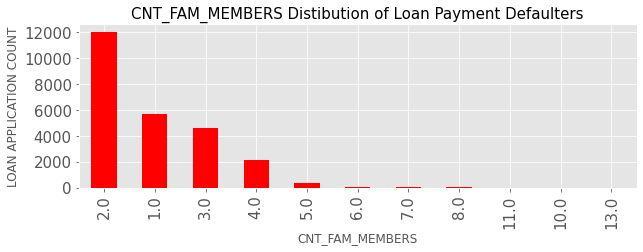

In [104]:
# CNT_FAM_MEMBERS Distibution of Loan Payment Defaulters

plt.figure(figsize = (10,3))

target1['CNT_FAM_MEMBERS'].value_counts().plot.bar(color='r',fontsize=15)
plt.title('CNT_FAM_MEMBERS Distibution of Loan Payment Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')
plt.show()

####  Observed that a family of 3 applies loan more often than the other families.

### Bivariate Analysis of Categoric to Continuous 

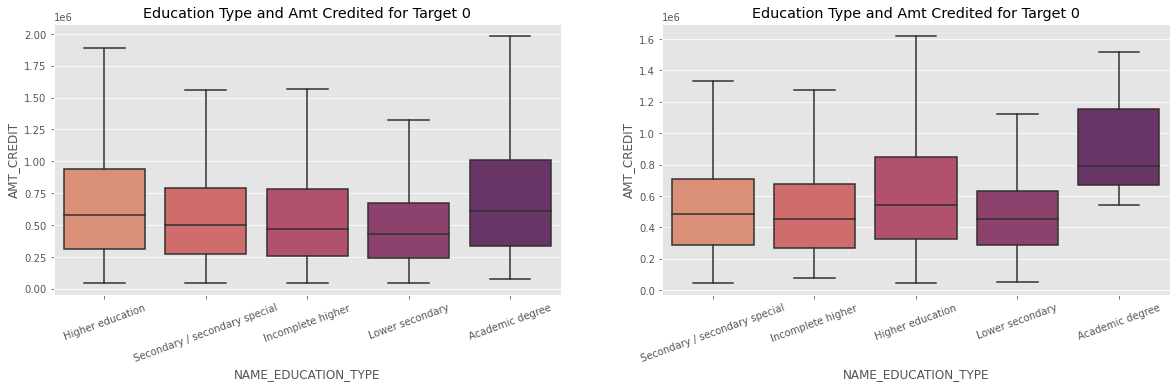

In [105]:
# Education Type and Amt Credited
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Education Type and Amt Credited for Target 0")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =target0,showfliers=False, palette="flare")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Education Type and Amt Credited for Target 0")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = target1,showfliers=False, palette="flare")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.show()


#### Observed that median of Loan values defaulting for Applicants with Academic degree is higher. But in a plot above, no of applicants with academic degree is miniscule and no inference can be drwan from this analysis.

In [106]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 0


res=pd.pivot_table(data=target0, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res,0)

CODE_GENDER                   F          M
NAME_INCOME_TYPE                          
Businessman           1125000.0  1272857.0
Commercial associate   668840.0   685304.0
Maternity leave        562500.0   765000.0
Pensioner              535162.0   571540.0
State servant          665132.0   695357.0
Student                372556.0   598753.0
Unemployed             787909.0  1045500.0
Working                577838.0   587183.0

In [107]:
#Analysing relationship of AMT_CREDIT with Gender and Income type for Target 1


res1=pd.pivot_table(data=target1, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res1,0)


CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Commercial associate  613418.0  599682.0
Maternity leave       929250.0       NaN
Pensioner             558498.0  556645.0
State servant         614062.0  616407.0
Unemployed            653250.0  546750.0
Working               537035.0  533821.0

#### Observerd that female on Maternity leave and unmployed, Females and males are defaulting larger loan values credited to them.

### Bivariate analysing categorical and categorical

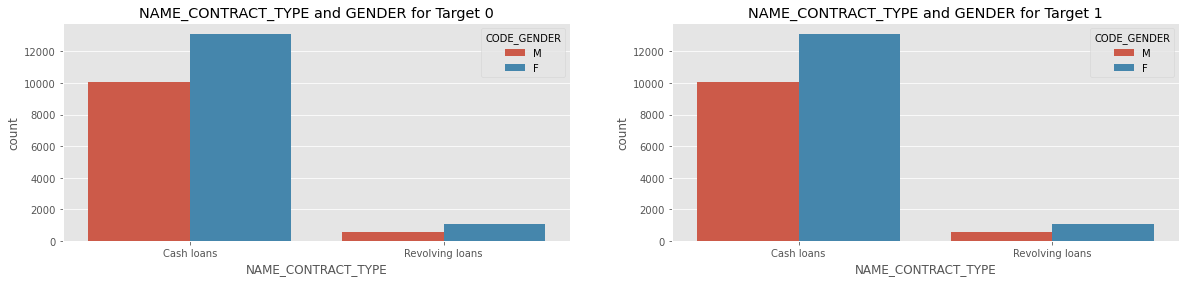

In [108]:
# Bivariate analysing categorical and categorical

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and GENDER for Target 0")

sns.countplot('NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data =target1)

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and GENDER for Target 1")
sns.countplot('NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data =target1)

plt.show()

 #### Observerd females as more loan applicant. As seen in plot above, though male applicants are lower, ratio of male applicants deafulting is higher. Let us check this by another analysis

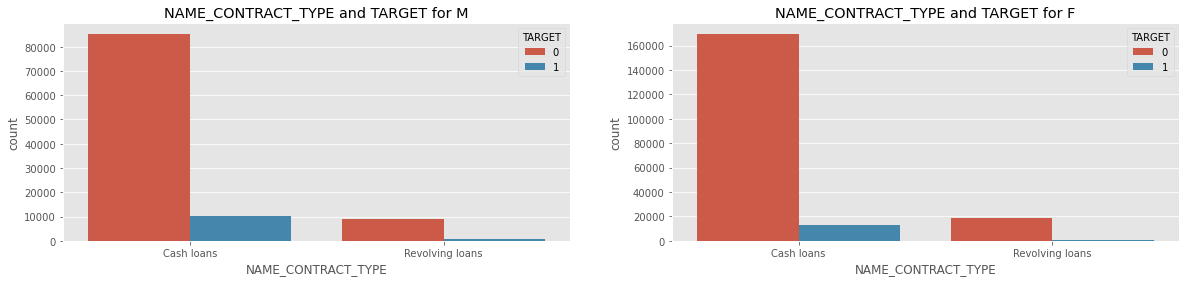

In [109]:
# Anaylsis for NAME_CONTRACT_TYPE with Target for M and F

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and TARGET for M")

sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=app0_d[(app0_d['CODE_GENDER']=="M")])

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and TARGET for F")
sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=app0_d[(app0_d['CODE_GENDER']=="F")])

plt.show()


#### Observerd that male applicants are defaulting more that female applicants.

### Top 10 correlation for target0 and target1

In [12]:
#Getting the top 10 correlation in target0
corr=target0.corr()
corr_d = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_d.columns=['Column1','Column2','Correlation']
corr_d.dropna(subset=['Correlation'],inplace=True)
corr_d['Abs_Correlation']=corr_d['Correlation'].abs()
corr_d = corr_d.sort_values(by=['Abs_Correlation'], ascending=False)
corr_d.head(10)

Column1                   Column2  Correlation  \
1493            FLAG_EMP_PHONE             DAYS_EMPLOYED    -0.999758   
6713          YEARS_BUILD_MEDI           YEARS_BUILD_AVG     0.998522   
8237  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998508   
7248            FLOORSMIN_MEDI             FLOORSMIN_AVG     0.997202   
7141            FLOORSMAX_MEDI             FLOORSMAX_AVG     0.997018   
7034            ENTRANCES_MEDI             ENTRANCES_AVG     0.996899   
6927            ELEVATORS_MEDI             ELEVATORS_AVG     0.996161   
6820           COMMONAREA_MEDI            COMMONAREA_AVG     0.995857   
7569           LIVINGAREA_MEDI            LIVINGAREA_AVG     0.995568   
6392           APARTMENTS_MEDI            APARTMENTS_AVG     0.995163   

      Abs_Correlation  
1493         0.999758  
6713         0.998522  
8237         0.998508  
7248         0.997202  
7141         0.997018  
7034         0.996899  
6927         0.996161  
6820         0.995857  
7569         0.995568  
6392         0.995163

In [11]:
#Getting the top 10 correlation in target1
corr=target1.corr()
corr_d = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_d.columns=['Column1','Column2','Correlation']
corr_d.dropna(subset=['Correlation'],inplace=True)
corr_d['Abs_Correlation']=corr_d['Correlation'].abs()
corr_d = corr_d.sort_values(by=['Abs_Correlation'], ascending=False)
corr_d.head(10)

Column1                   Column2  Correlation  \
1493            FLAG_EMP_PHONE             DAYS_EMPLOYED    -0.999702   
8237  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998269   
6499         BASEMENTAREA_MEDI          BASEMENTAREA_AVG     0.998250   
6820           COMMONAREA_MEDI            COMMONAREA_AVG     0.998107   
6713          YEARS_BUILD_MEDI           YEARS_BUILD_AVG     0.998100   
7676  NONLIVINGAPARTMENTS_MEDI   NONLIVINGAPARTMENTS_AVG     0.998075   
7248            FLOORSMIN_MEDI             FLOORSMIN_AVG     0.997825   
7462     LIVINGAPARTMENTS_MEDI      LIVINGAPARTMENTS_AVG     0.997668   
7141            FLOORSMAX_MEDI             FLOORSMAX_AVG     0.997187   
7690  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAPARTMENTS_MODE     0.997032   

      Abs_Correlation  
1493         0.999702  
8237         0.998269  
6499         0.998250  
6820         0.998107  
6713         0.998100  
7676         0.998075  
7248         0.997825  
7462         0.997668  
7141         0.997187  
7690         0.997032

#### Obesrve that the Top 10 correlation columns are same for Target 0 and Target 1 dataframes.
#### We will further analyse each of these on a scatter plot to get better inferenes.

###  Analysis on Continuous Variables.

In [13]:
# Total list for column1
biva0=corr_d.head(10)['Column1'].tolist()
biva0

['FLAG_EMP_PHONE',
 'YEARS_BUILD_MEDI',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLOORSMIN_MEDI',
 'FLOORSMAX_MEDI',
 'ENTRANCES_MEDI',
 'ELEVATORS_MEDI',
 'COMMONAREA_MEDI',
 'LIVINGAREA_MEDI',
 'APARTMENTS_MEDI']

In [14]:
# Total list for column2
biva1=corr_d.head(10)['Column2'].tolist()
biva1

['DAYS_EMPLOYED',
 'YEARS_BUILD_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLOORSMIN_AVG',
 'FLOORSMAX_AVG',
 'ENTRANCES_AVG',
 'ELEVATORS_AVG',
 'COMMONAREA_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_AVG']

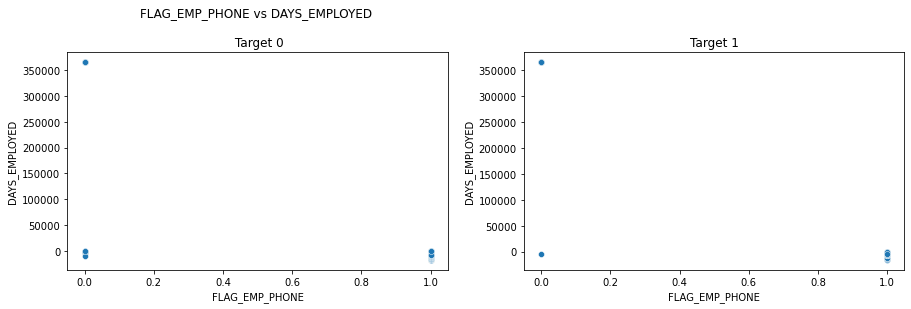

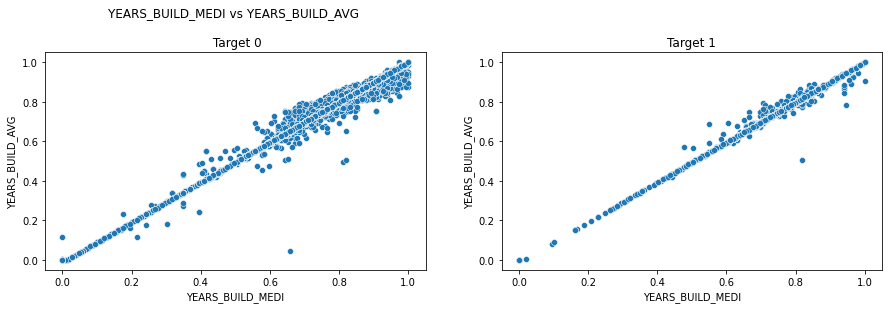

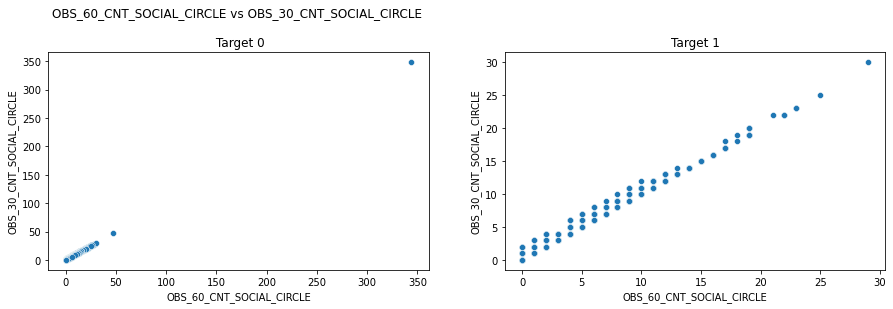

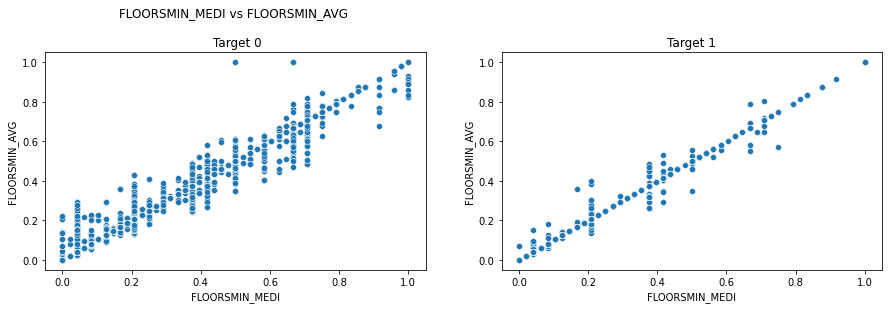

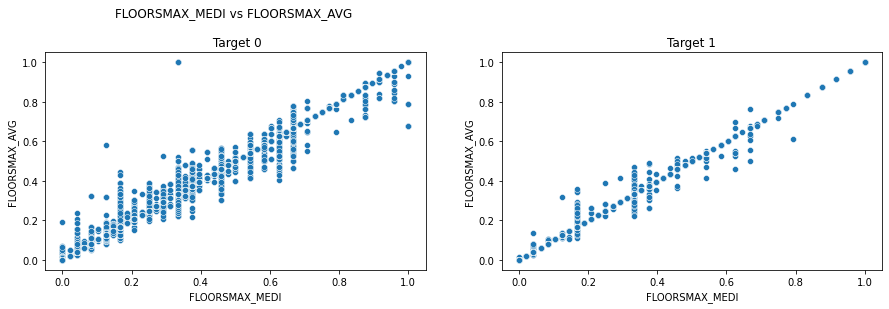

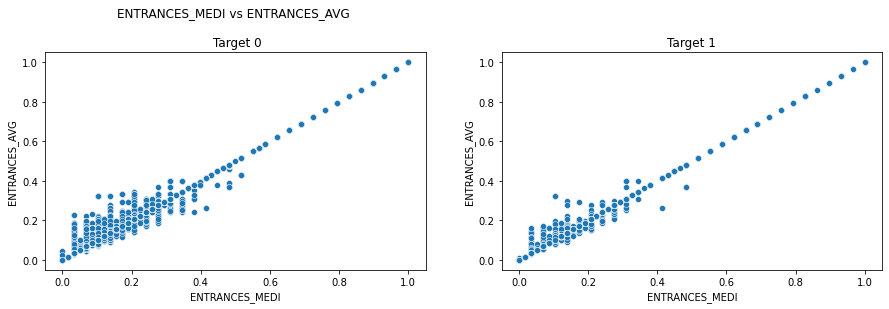

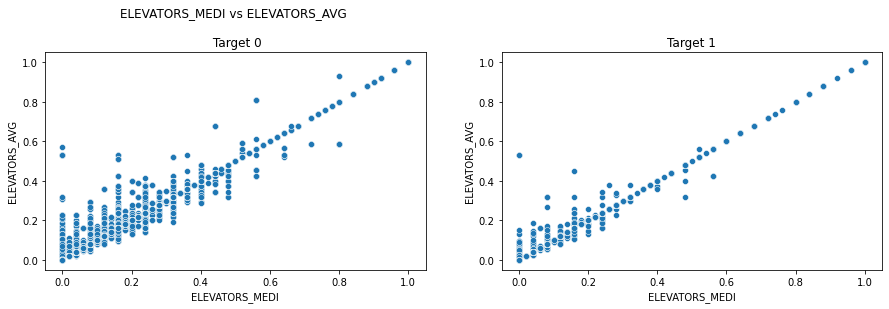

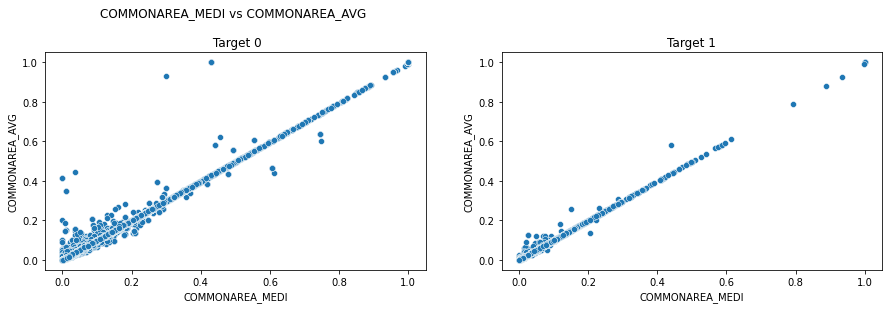

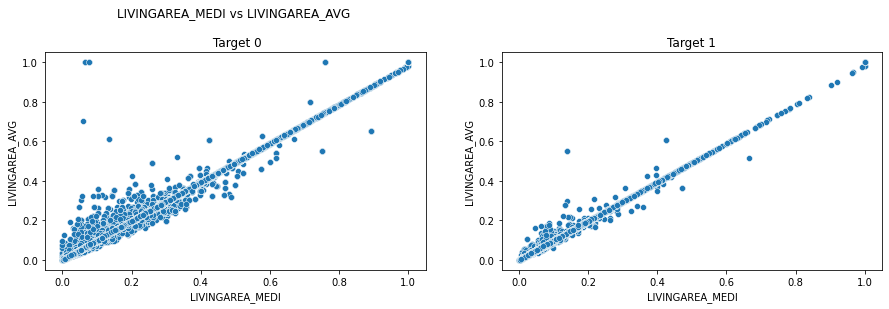

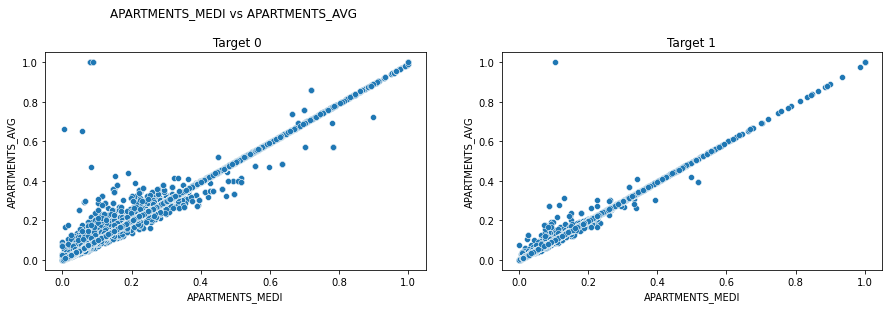

In [15]:
i=0
for i in range(10):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
    sns.scatterplot(x=biva0[i], y=biva1[i],data=target0,ax=ax1, ci=90)
    ax1.set_xlabel(biva0[i])    
    ax1.set_ylabel(biva1[i])
    ax1.set_title(f'{biva0[i]} vs {biva1[i]} \n\n Target 0',fontsize=12)
    
    sns.scatterplot(x=biva0[i], y=biva1[i],data=target1,ax=ax2)
    ax2.set_xlabel(biva0[i])    
    ax2.set_ylabel(biva1[i])
    ax2.set_title(f'Target 1',fontsize=12)
            
    plt.show()    
    i=i+1
    


    1. OBS_30_CNT_SOCIAL_CIRCLE',OBS_60_CNT_SOCIAL_CIRCLE' - denote the client's social surroundings with observable 30/60    DPD.
    These are definetly correlated. We can also see that its higher and steeper for Target 1, signyfying that in approval process this parameter must be strongly looked into.
    2.DEF_30_CNT_SOCIAL_CIRCLE - Trend is going up. But Target 1 has lesser data and hence graph is not dense.
    3. Years employed has an outlier value of 999 and this is skewing the graph
    4.AMT_CREDIt and AMT_GOOD PRICE dont seem to be increasing proportionately with AMT_INCOME for TARGET 1, thus possibly leading to default.

## Previous Application Dataset analysis

In [25]:
# checking dataset
pre0_a.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [26]:
# Loading information
pre0_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [27]:
# checking shape
pre0_a.shape

(1670214, 37)

## Cleaning Data 

### Checking Missing Values

In [28]:
# checking null values
pre0_a.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [29]:

# Checking the % of null values for each column in new dataset
null = pre0_a.isnull().sum()/len(pre0_a)*100
null.sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [47]:
# Removing all the columns with more than 50% of null values
pre0_a = pre0_a.loc[:,pre0_a.isnull().mean()<=0.5]


In [48]:
pre0_a.shape

(1670214, 33)

## Univariate analysis

In [31]:
# function to count plot for categorical variables
def univariate_p(var):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=var, data=pre0_a,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    
    plt.show()

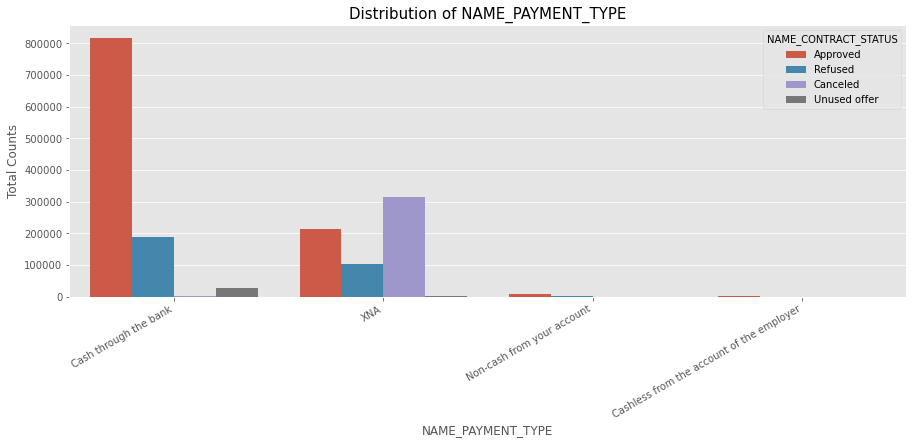

In [32]:
# Distribution NAME_PAYMENT_TYPE
univariate_p('NAME_PAYMENT_TYPE')

#### Observed that most of the clients chose to repay the loan using the 'Cash through the bank' option, also observed 'Non-Cash from your account' & 'Cashless from the account of the employee' options are not at all popular in terms of loan repayment amongst the customers.

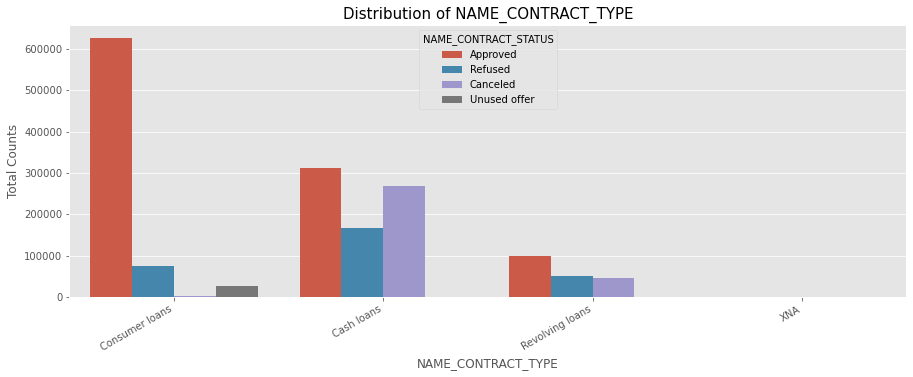

In [33]:
# Distribution of NAME_PAYMENT_TYPE
univariate_p('NAME_CONTRACT_TYPE')

 #### Observed that most of the applications are for 'Cash loan' and 'Consumer loan'. Although the cash loans are refused more often than others.

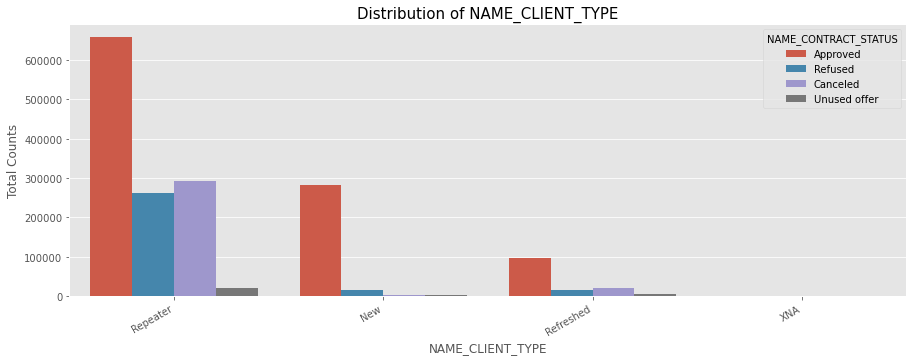

In [34]:
# Distribution NAME_CLIENT_TYPE
univariate_p('NAME_CLIENT_TYPE')

#### Most of the loan applications are from repeat customers, out of the total applications customers are repeaters. They also get refused most often also.

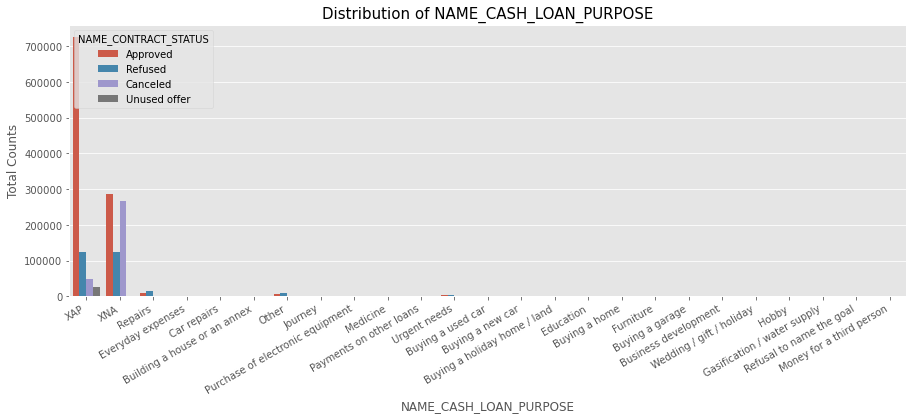

In [35]:
# For NAME_CASH_LOAN_PURPOSE
univariate_p('NAME_CASH_LOAN_PURPOSE')

In [36]:
pre0_a.NAME_CLIENT_TYPE.unique()

array(['Repeater', 'New', 'Refreshed', 'XNA'], dtype=object)

### Using box plot to do some more bivariate analysis on categorical vs numeric columns.

In [38]:
#bivariate analysis function
def categorical_numeric(cate, nume):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cate,y = nume, data=pre0_a)
    ax.set_ylabel(f'{nume}')
    ax.set_xlabel(f'{cate}')

    ax.set_title(f'{cate} Vs {nume}',fontsize=16)
     
    plt.show()

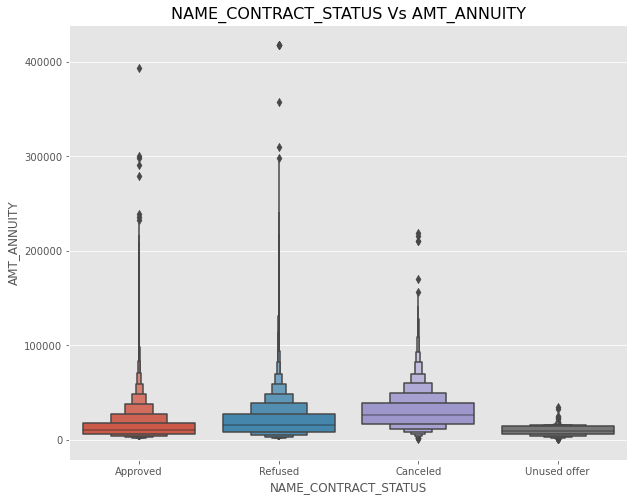

In [39]:
# for NAME_CONTRACT_STATUS and AMT_ANNUITY
categorical_numeric('NAME_CONTRACT_STATUS', 'AMT_ANNUITY')

#### Observed that loan application for people with lower AMT_ANNUITY gets canceled or Unused most of the time,also applications with too high AMT ANNUITY also got refused more often than others.

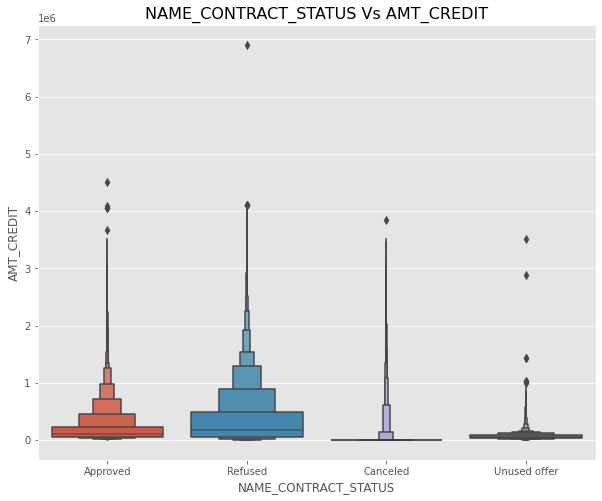

In [41]:
# For NAME_CONTRACT_STATUS vs AMT_CREDIT

categorical_numeric('NAME_CONTRACT_STATUS', 'AMT_CREDIT')


#### Observed that when the AMT_CREDIT is too low, it get's cancelled/unused most of the time.

### Top Correlation of Previous application

In [60]:
# Finding correlation
corr_prev = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_prev.columns=['Column1','Column2','Correlation']
corr_prev.dropna(subset=['Correlation'],inplace=True)
corr_prev = corr_prev.sort_values(by=['Correlation'], ascending=False)

corr_prev.head(10)

Column1             Column2  Correlation
88             AMT_GOODS_PRICE     AMT_APPLICATION     0.999884
89             AMT_GOODS_PRICE          AMT_CREDIT     0.993087
71                  AMT_CREDIT     AMT_APPLICATION     0.975824
269           DAYS_TERMINATION       DAYS_LAST_DUE     0.927990
87             AMT_GOODS_PRICE         AMT_ANNUITY     0.820895
70                  AMT_CREDIT         AMT_ANNUITY     0.816429
53             AMT_APPLICATION         AMT_ANNUITY     0.808872
232  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING     0.803494
173                CNT_PAYMENT     AMT_APPLICATION     0.680630
174                CNT_PAYMENT          AMT_CREDIT     0.674278

<Figure size 1296x576 with 0 Axes>

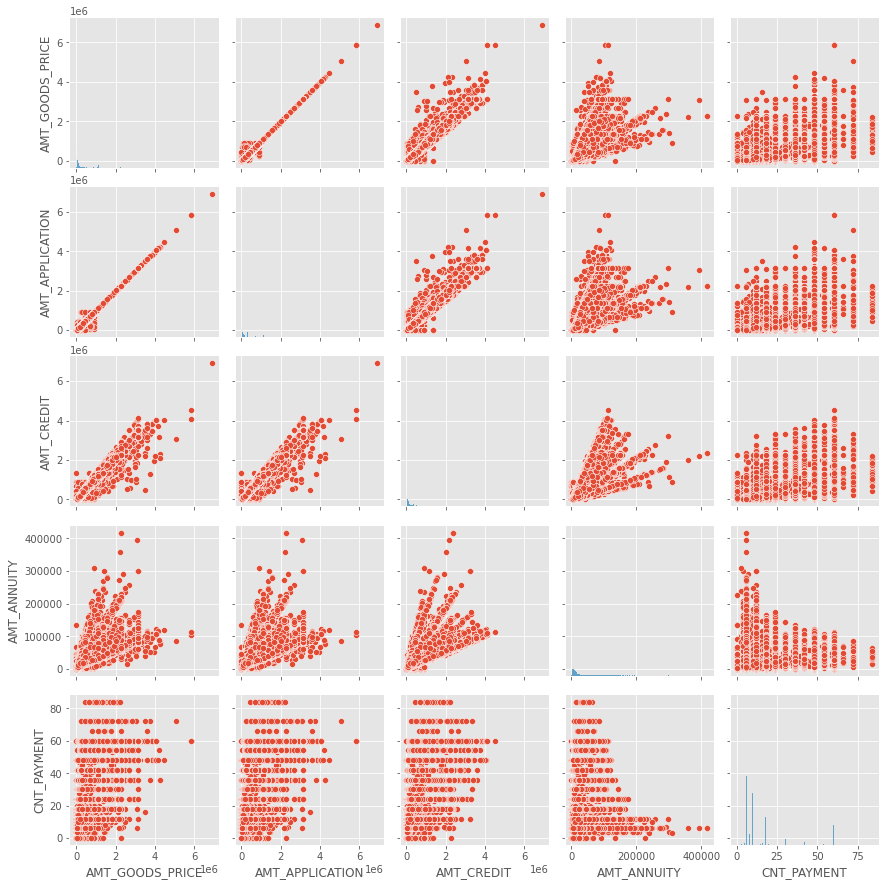

In [61]:
# Plot to show correlation selected columns
plt.figure(figsize=[18,8]) 
sns.pairplot(pre0_a[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])
plt.show()      
    


AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION - as expected have high correlation. Higher the value of good purchased more there will be need of loan and surely all these will correlate
Similary, AMT_Credit to AMT_GOOD_PRICE also the correlation is high
Column CNT_Payment ideally should have had a high correlation with AMT_credit, ie higher credit, more the term of 
loan. But no such correaltion can be seen.



In [42]:
# Checking for previous application data
pre0_a.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  \
0                       15                           Y  ...   
1                       11                           Y  ...   
2                       11                           Y  ...   
3                        7                           Y  ...   
4                        9                           Y  ...   

   NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0          Connectivity        12.0           middle   
1                   XNA        36.0       low_action   
2                   XNA        12.0             high   
3                   XNA        12.0           middle   
4                   XNA        24.0             high   

        PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0  POS mobile with interest           365243.0          -42.0   
1          Cash X-Sell: low           365243.0         -134.0   
2         Cash X-Sell: high           365243.0         -271.0   
3       Cash X-Sell: middle           365243.0         -482.0   
4         Cash Street: high                NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION  \
0                     300.0         -42.0            -37.0   
1                     916.0      365243.0         365243.0   
2                      59.0      365243.0         365243.0   
3                    -152.0        -182.0           -177.0   
4                       NaN           NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 33 columns]

In [43]:
# Checking for application data
app0_d.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

## Merging the application data file and Previous Application file.

In [52]:
# Merging both the data
new_d = pd.merge(app0_d,pre0_a,how='left', on=['SK_ID_CURR'])

In [53]:
# After merge of both the data
new_d.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...       Auto technology        24.0       low_normal   
1        35698.5  ...                   XNA        12.0       low_normal   
2        35698.5  ...             Furniture         6.0           middle   
3        35698.5  ...  Consumer electronics        12.0           middle   
4         6750.0  ...          Connectivity         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0         -565.0   
1             Cash X-Sell: low           365243.0         -716.0   
2   POS industry with interest           365243.0         -797.0   
3  POS household with interest           365243.0        -2310.0   
4  POS mobile without interest           365243.0         -784.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0          -25.0             -17.0   
1                     -386.0         -536.0            -527.0   
2                     -647.0         -647.0            -639.0   
3                    -1980.0        -1980.0           -1976.0   
4                     -694.0         -724.0            -714.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        1.0  
4                        0.0  

[5 rows x 113 columns]

In [54]:
# checking shape
new_d.shape

(1430155, 113)

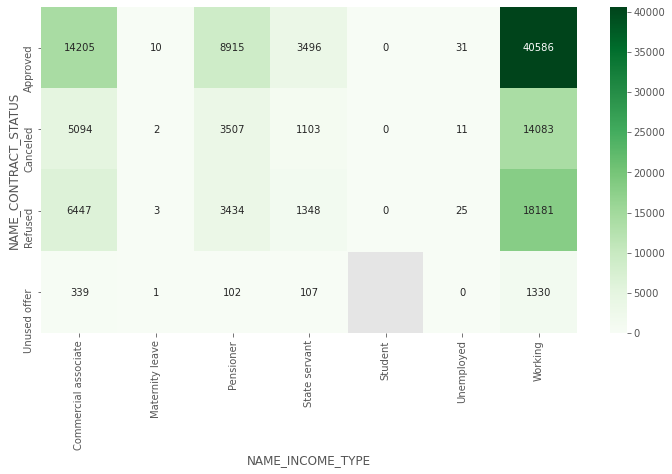

In [49]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target

res=pd.pivot_table(data=new_d,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Greens', fmt="g")
plt.show()

#### Working applicant with Approved status have defaulted in highest numbers.Previous applications with Refused, Cancelled, Unused loans also have default which need to be  concern. This indicates that the financial company had Refused/cancelled previous application, but  has approved the current and is facing default on these loans.14,204 applicanst of working class were refused earlier and now have defaulted.

### Using Heatmap for checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE“ aggregating on Target

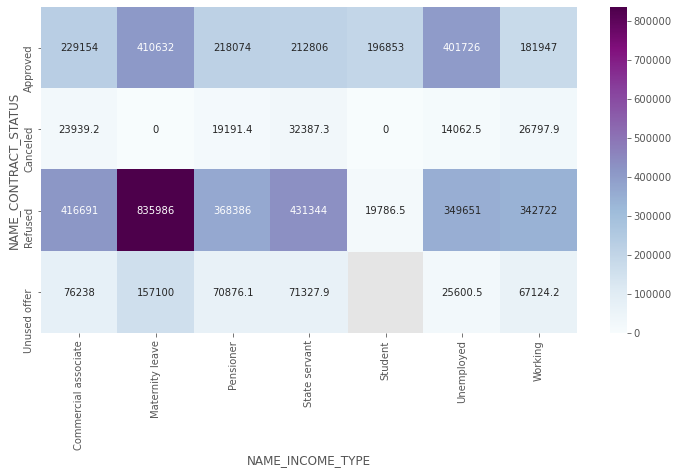

In [50]:
# Useing Heatmap for analysis
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target

res=pd.pivot_table(data=new_d,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='BuPu', fmt="g")
plt.show()

#### Highely refused in Maternity leave and approved load is 410632

# Case Observation 
   
### Defaulters' demography
      All the below variables were established in analysis of Application dataframe as leading 
      to default. 
      Checked these against the Approved loans which have defaults, and it proves to be correct
        Medium income
        25-35 years old , followed by 35-45 years age group
        Male
        Unemployed
        Labourers, Salesman, Drivers
        Business type 3
        Own House - No
 ### Other important Factors to be considered
        Days last phone number changed - Lower figure points at concern
        No of Bureau Hits in last week. Month etc – zero hits is good
        Amount income not correspondingly equivalent to Good Bought – Income low and good value 
        high is a concern.
        Previous applications with Refused, Cancelled, Unused loans also have default which is
        a matter of concern.   
        This indicates that the financial company had Refused/Cancelled previous application but 
        has approved the current and is  facing default on these. 
        
### Credible Applications refused
    Unused applications have lower loan amount.
    Female applicants should be given extra weightage as defaults are lesser.
    60% of defaulters are Working applicants.This does not mean working applicants must be refused.     
    Proper scrutiny of other parameters needed.
    Previous applications with Refused, Cancelled,Unused loans also have cases where payments are coming on time in current         application. This indicates that possibly wrong decisions were done in those cases.